<img src="houses.jpg" style="width:100%;height:400px"/>

# House Sale Prices Regression

These house types are designed for the US and Canada . All of these house properties are related to a price. Which property is more or less expensive?All of these correlations are good to observe which is what I am going to do in this project.Whatever it takes: far from a highway, far from a mall? What does really impact on a price or what is optimal price, or is there an outlier? A lot of questions and considerations. I am going to answer these question doing some research and statistics in this project. 

original version of the dataset https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [7]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Import Train and Test Data 
file =  'https://github.com/NewtoIBM/data_student'
df3 = pd.read_csv(file + 'test.csv', error_bad_lines=False) 
train = 'https://github.com/NewtoIBM/data_student'
df1=  pd.read_csv(test + 'train.csv', error_bad_lines=False) 
combined = pd.concat([df1, df3],sort=True)
#df4 = pd.read_csv(file2 + 'data_description.txt', error_bad_lines=False) 
#df5= df.melt(['text', 'Count'],['label','label_num'],'ham','spam')        #(frame=df, id_vars='label')
#df5 = df3.unstack()
#df6= df3.pivot_table(index='SalePrice',columns='Street', values='LotFrontage')
combined.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


### output

In [36]:
print(combined.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [38]:
#exploring  what data types and if any missing values
combined = combined.reindex(sorted(combined.columns), axis=1) #sorting data alphabetically
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [39]:
#printing first 5 rows
combined.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


## Exploratory data analysis

In [40]:
combined['Alley'].fillna(combined['Alley'].mode()[0], inplace=True)  # filling NaN or missing values
#df3.fillna(value="None",inpalce = True)
#df3.Alley.fillna(df3.median(), inpalce = True)

In [41]:
print(combined['Alley']) # checking if missing values are filled

0       Grvl
1       Grvl
2       Grvl
3       Grvl
4       Grvl
        ... 
1454    Grvl
1455    Grvl
1456    Grvl
1457    Grvl
1458    Grvl
Name: Alley, Length: 2919, dtype: object


In [42]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

In [43]:
print(combined['LotFrontage'].value_counts(dropna=False))
print(combined['LotArea'].value_counts(dropna=False))

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64


#  Data Wrangling  techniques 

In [44]:
# checking number of columns and rows
print(combined.shape) 

(2919, 81)


In [45]:
# checking for duplicates
combined.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

In [46]:
# testing with assert statement if I have null values
assert pd.notnull(combined).all().all() 

AssertionError: 

# Detecting outliers

In [48]:
#Finding quartiles of SalePrice
combined.SalePrice.quantile([0.25,0.5,0.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [ ]:
#IQR = 75th percentile-25th percentile
IQR = 214000.0-129975.0

In [ ]:
1.5*IQR

In [18]:
#Any number less than this is a suspected outlier.
163000.0-126037.5

36962.5

In [19]:
#Any number less than this is a suspected outlier.
163000.0+126037.5

289037.5

# The boundaries are found so I can remove the data that is out of these boundaries.

In [71]:

outlier_great = combined.loc[(combined['SalePrice'] > 36962.5) ]
outlier_great.fillna(method='bfill', inplace=True) 
#df4 = combined[combined['SalePrice'] > 36962.5] 
#df4['SalePrice']
outlier_great

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,Grvl,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,Grvl,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,Grvl,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,Grvl,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,Grvl,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,953.0,AllPub,0,1999,2000,2007
1456,2073,0,0,NaN,3,1Fam,TA,No,790.0,163.0,...,WD,0,Pave,7,1542.0,AllPub,349,1978,1988,2010
1457,1188,1152,0,NaN,4,1Fam,Gd,No,275.0,0.0,...,WD,0,Pave,9,1152.0,AllPub,0,1941,2006,2010
1458,1078,0,0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,WD,0,Pave,5,1078.0,AllPub,366,1950,1996,2010


In [72]:
outlier_less = combined.loc[(combined['SalePrice'] < 289037.5 ) ]
outlier_less.fillna(method='bfill', inplace=True) 
#df4 = combined[combined['SalePrice'] < 289037.5 ] 
#print(df4['SalePrice'])
outlier_less

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,Grvl,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,Grvl,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,Grvl,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,Grvl,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,Grvl,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,953.0,AllPub,0,1999,2000,2007
1456,2073,0,0,NaN,3,1Fam,TA,No,790.0,163.0,...,WD,0,Pave,7,1542.0,AllPub,349,1978,1988,2010
1457,1188,1152,0,NaN,4,1Fam,Gd,No,275.0,0.0,...,WD,0,Pave,9,1152.0,AllPub,0,1941,2006,2010
1458,1078,0,0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,WD,0,Pave,5,1078.0,AllPub,366,1950,1996,2010


# Statistical Approach

In [51]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
3SsnPorch,2919.0,2.602261,25.188169,0.0,0.0,0.0,0.0,508.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
EnclosedPorch,2919.0,23.098321,64.244246,0.0,0.0,0.0,0.0,1012.0


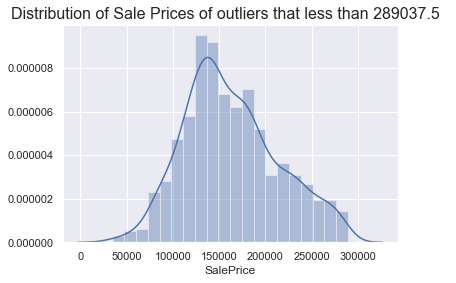

In [79]:
sns.set(color_codes=True)

sns.distplot(outlier_less['SalePrice'],bins=20).set_title('Distribution of Sale Prices of outliers that less than 289037.5  ',fontsize=16);

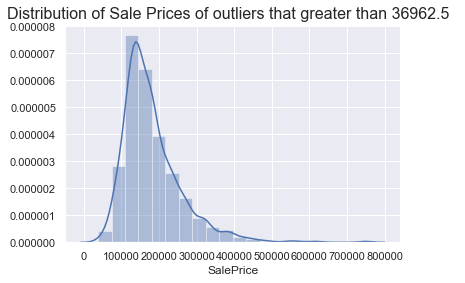

In [78]:
sns.set(color_codes=True)

sns.distplot(outlier_great['SalePrice'],bins=20).set_title('Distribution of Sale Prices of outliers that greater than 36962.5  ',fontsize=16);